<a href="https://www.kaggle.com/code/tricycleman/notebook238557c010?scriptVersionId=101072847" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tom-and-jerry-image-classification/challenges.csv
/kaggle/input/tom-and-jerry-image-classification/ground_truth.csv
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame2268.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame2274.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame4213.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame3782.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame4327.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame918.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame1701.jpg
/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/tom_jerry_1/frame1384.jpg
/kaggle/input/tom-and-jerry-image-classificatio

Following along the tensorflow guide on Image classification: https://www.tensorflow.org/tutorials/images/classification

In [2]:
IMAGE_DIRECTORY = "/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/"

batch_size = 32
img_height = 72
img_width = 128

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  IMAGE_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5478 files belonging to 4 classes.
Using 4383 files for training.


2022-07-17 18:37:54.358519: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  IMAGE_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5478 files belonging to 4 classes.
Using 1095 files for validation.


In [5]:
class_names = train_ds.class_names

2022-07-17 18:37:54.780309: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


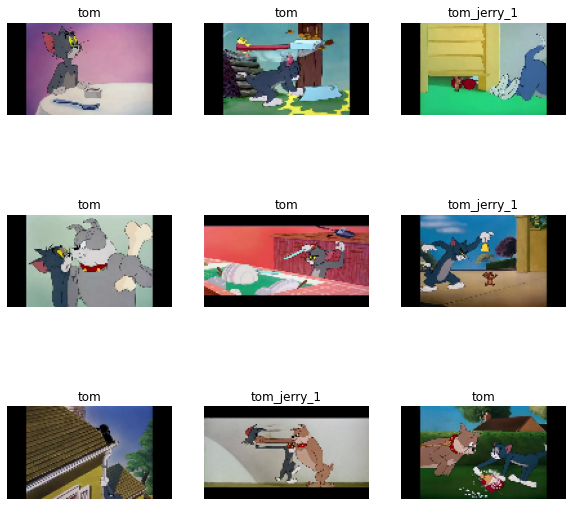

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 72, 128, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 72, 128, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 72, 128, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 16, 64)         0

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
137/137 [==============================] - 22s 94ms/step - loss: 1.2539 - accuracy: 0.4305 - val_loss: 1.0266 - val_accuracy: 0.5900
Epoch 2/10
137/137 [==============================] - 10s 74ms/step - loss: 0.9120 - accuracy: 0.6336 - val_loss: 0.7407 - val_accuracy: 0.7187
Epoch 3/10
137/137 [==============================] - 11s 80ms/step - loss: 0.6405 - accuracy: 0.7645 - val_loss: 0.5914 - val_accuracy: 0.7836
Epoch 4/10
137/137 [==============================] - 10s 75ms/step - loss: 0.4600 - accuracy: 0.8332 - val_loss: 0.5612 - val_accuracy: 0.7863
Epoch 5/10
137/137 [==============================] - 10s 76ms/step - loss: 0.3384 - accuracy: 0.8757 - val_loss: 0.5731 - val_accuracy: 0.7781
Epoch 6/10
137/137 [==============================] - 11s 80ms/step - loss: 0.2497 - accuracy: 0.9140 - val_loss: 0.5363 - val_accuracy: 0.8164
Epoch 7/10
137/137 [==============================] - 10s 75ms/step - loss: 0.1965 - accuracy: 0.9290 - val_loss: 0.4902 - val_accuracy:

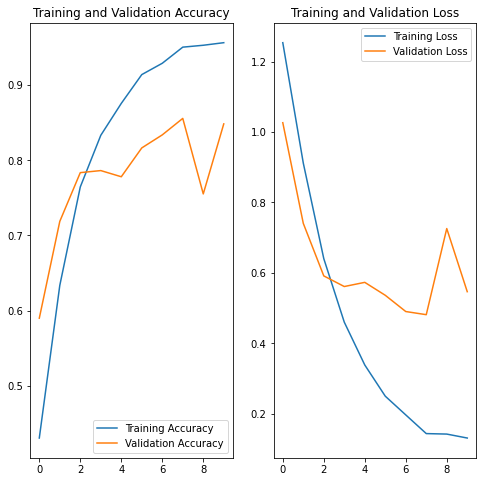

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Add a dropout layer and retrain

In [18]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 72, 128, 3)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 128, 16)       448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 64, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 36, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 16, 64)        

In [19]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
137/137 [==============================] - 13s 93ms/step - loss: 1.2233 - accuracy: 0.4349 - val_loss: 1.0134 - val_accuracy: 0.5808
Epoch 2/15
137/137 [==============================] - 12s 90ms/step - loss: 0.8642 - accuracy: 0.6619 - val_loss: 0.7372 - val_accuracy: 0.7078
Epoch 3/15
137/137 [==============================] - 12s 84ms/step - loss: 0.6310 - accuracy: 0.7566 - val_loss: 0.6086 - val_accuracy: 0.7699
Epoch 4/15
137/137 [==============================] - 10s 75ms/step - loss: 0.4709 - accuracy: 0.8225 - val_loss: 0.5363 - val_accuracy: 0.8064
Epoch 5/15
137/137 [==============================] - 10s 76ms/step - loss: 0.3653 - accuracy: 0.8649 - val_loss: 0.4782 - val_accuracy: 0.8283
Epoch 6/15
137/137 [==============================] - 11s 83ms/step - loss: 0.2800 - accuracy: 0.9014 - val_loss: 0.4284 - val_accuracy: 0.8539
Epoch 7/15
137/137 [==============================] - 10s 75ms/step - loss: 0.2173 - accuracy: 0.9220 - val_loss: 0.4772 - val_accuracy:

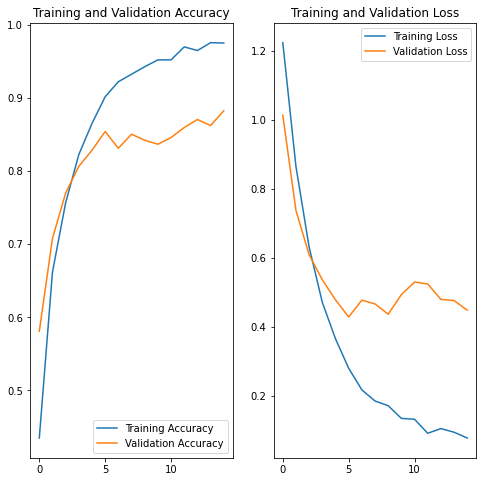

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()